<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithmes which can discover patterns within visual data.  Such as a camera of a self-driving car recognizing the car in front

## Get the data


In [2]:
import zipfile
import os
if(not "pizza_steak.zip" in os.listdir()):
    !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    # unzip
    zip_ref = zipfile.ZipFile("pizza_steak.zip")
    zip_ref.extractall()
    zip_ref.close()
tf.config.list_physical_devices(
    device_type='GPU'
)

NameError: name 'tf' is not defined

The images we're working with are from the Food101 dataset(101 different classes of food): https://kaggle.com/dansbecker/food101

However we've modified it to use only two classes(pizza & steak) using the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note** We start with a smaller dataset so that we can experiment quickly so we can figure out what works and what doesn't work before scaling up.

## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the dataset

And for computer vision project.... this usually means visualizing many smamples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# walk through the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names from sub directories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Set up the target directory(we'll view images from here)
  target_folder = target_dir+"/"+target_class
  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in image and plot using matplot lib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 384, 3)


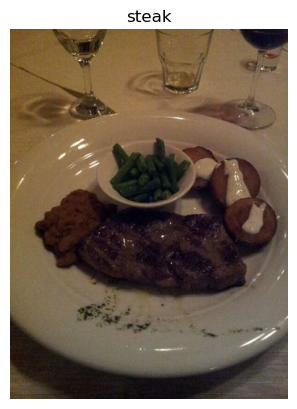

In [9]:
# View random image from the dataset
classes = ["pizza","steak"]
img = view_random_image("pizza_steak/train",classes[random.randint(0,1)])

In [10]:
import tensorflow as tf
tf.constant(img)

2024-04-24 22:32:34.700265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[108,  74,  28],
        [109,  75,  29],
        [110,  78,  31],
        ...,
        [ 34,  25,  42],
        [ 30,  21,  38],
        [ 27,  18,  35]],

       [[111,  77,  31],
        [110,  76,  30],
        [108,  76,  29],
        ...,
        [ 32,  23,  40],
        [ 32,  23,  40],
        [ 31,  22,  39]],

       [[112,  78,  32],
        [110,  76,  30],
        [108,  76,  29],
        ...,
        [ 34,  25,  42],
        [ 35,  26,  43],
        [ 36,  27,  44]],

       ...,

       [[ 82,  71,  43],
        [ 76,  65,  37],
        [ 79,  67,  41],
        ...,
        [ 78,  68,  56],
        [ 80,  71,  56],
        [ 78,  69,  54]],

       [[ 81,  72,  43],
        [ 75,  66,  37],
        [ 80,  68,  42],
        ...,
        [ 86,  76,  64],
        [ 90,  81,  66],
        [ 94,  85,  70]],

       [[ 72,  63,  34],
        [ 63,  54,  25],
        [ 65,  53,  29],
        ...,
        [ 78,  68,  5

In [11]:
# View the image shape
img.shape # returns width, heigh, colour channels

(512, 384, 3)

In [12]:
img / 255.

array([[[0.42352941, 0.29019608, 0.10980392],
        [0.42745098, 0.29411765, 0.11372549],
        [0.43137255, 0.30588235, 0.12156863],
        ...,
        [0.13333333, 0.09803922, 0.16470588],
        [0.11764706, 0.08235294, 0.14901961],
        [0.10588235, 0.07058824, 0.1372549 ]],

       [[0.43529412, 0.30196078, 0.12156863],
        [0.43137255, 0.29803922, 0.11764706],
        [0.42352941, 0.29803922, 0.11372549],
        ...,
        [0.1254902 , 0.09019608, 0.15686275],
        [0.1254902 , 0.09019608, 0.15686275],
        [0.12156863, 0.08627451, 0.15294118]],

       [[0.43921569, 0.30588235, 0.1254902 ],
        [0.43137255, 0.29803922, 0.11764706],
        [0.42352941, 0.29803922, 0.11372549],
        ...,
        [0.13333333, 0.09803922, 0.16470588],
        [0.1372549 , 0.10196078, 0.16862745],
        [0.14117647, 0.10588235, 0.17254902]],

       ...,

       [[0.32156863, 0.27843137, 0.16862745],
        [0.29803922, 0.25490196, 0.14509804],
        [0.30980392, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images.  More specifically we need a way to:

* Load our images
* Pre process our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data(get all pixel values between 1 & 0, also called scaling / normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "./pizza_steak/train"
test_dir="./pizza_steak/test"
# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32, target_size=(224,224), class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/home/sl0th/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/sl0th/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 464ms/step - accuracy: 0.5622 - loss: 0.6594 - val_accuracy: 0.8140 - val_loss: 0.4361
Epoch 2/5


2024-04-24 22:32:59.824520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-24 22:32:59.828295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


AttributeError: 'NoneType' object has no attribute 'items'

**Note:** If the above cell is taking longer than ~10 seconds per epoch make sure you're using a GPU runtime

In [ ]:
# Get model summary
model_1.summary()

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from the [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94210&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model  to replicate Tensorflow Playground Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

In [ ]:
# set random seed
tf.random.set_seed(42)

my_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
my_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = my_model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

In [ ]:
model_2.summary()

Despite having 20x more parameters than our original CNN, the model performs terribly... let's try again

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model  to replicate Tensorflow Playground Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

In [ ]:
model_3.summary()

In [ ]:
15000000 / 31000

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. intuitively, better. And in lots of cases it is. But in this case, the difference here is two different styles of model we're using where a series of dense layers has a number of different learnable parameters connected to each other and hence a high number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.  So even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different features in an image.

In [ ]:
model_1.summary()

## Binary Classification: Let's break it down
1. Become one with the data(visualize,visualize,visualize)
2. Preprocess the data(prepped it for our model, the main step was scaling / normalizing)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(experiment,experiment,experiment)

## 1. Become one with the data

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2. Pre-process the data(prepare it for a model)

In [ ]:
# Define our directory dataset paths

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset of the data.  Splits data into a certain number to make training easier and so as not to cause overflows.

it does this for a couple of reasons:
1. memory limitations - larger numbers may not fit on memory available
2. Trying to learn patterns in 10k images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is standard practice, although larger numbers could be useful in some cases.

In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # get next batch of images / labels in train data
len(images),len(labels)

In [ ]:
# How many batches are there
len(train_data)

In [ ]:
1500 / 32

In [ ]:
# Get the first two images
images[:2], images[0].shape

In [ ]:
images[7].shape

In [ ]:
# View the first batch of labels
labels

### 3. Create a CNN model(start with a baseline)

A baseline is a relatively simple model or existing result that you setup when you start a machine learning model which you will use as a metric when comparing to other models

**NOTE:** In deep learning there is an almost infinite amount of architectures you could create.  So one of the best ways to get started is start by using something simple and see if it works then introduce complexity as required.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([Conv2D(filters=10, # Filter is the number of sliding windows going across the input
                             kernel_size=3, # The size of the sliding window going across an input
                             strides=1, # The size of the step the sliding window takes across an input
                             padding="valid", # if 'same' the output shape is same as input shape, if 'valid' output shape gets compressed
                             activation="relu",
                             input_shape=(224,224,3)), #input layer
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid") # output layer 1 and sigmoid since bary
                      ])

In [ ]:
model_4.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

## 4. Fit the model

In [ ]:
# Check the lengths of training and test generators
len(train_data), len(test_data)

In [ ]:
# fit the model
history_4 = model_4.fit(train_data, epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_1.summary()

## 5. evaluating our model

It looks like our model is learning something, let's evaluate it.

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves seperately

def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation loss curves
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label="Training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curve(history_4)

**Note:** When a model's **Validation loss starts to increase**, it's likely that the model is **Overfitting** the training dataset.  This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **Regularization**.

In [ ]:
# Create the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# compile the model
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

In [ ]:
# Get a summary of our model with max polling
model_5.summary()

In [ ]:
model_4.summary()

In [ ]:
# Plot loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.02,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

Data Augmentation modifies the image slightly to allow for more diversity in the dataset which artificially inflates it.  This allows the model to better generalise to new data.

In [ ]:
# import data and augment it from training directory
print("Augmented training data")

IMG_SIZE = (224,224)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)
# create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

**Note:** Data augmentation is usually only performed on the training data.  Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data

In [ ]:
# Get sample of augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

In [ ]:
random_number = random.randint(1,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now let's try on our augmented set

In [ ]:
# Create the model(this is going to be our new baseline)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile the model
model_6.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

In [ ]:
# Check models training curves
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size=(224,224),
                                                                               class_mode="binary",
                                                                               batch_size=32,
                                                                               shuffle=True)


In [ ]:
# Create the model (same as model 5 and model 6)
# Create the model(this is going to be our new baseline)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

history_7 = model_7.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

In [ ]:
plot_loss_curve(history_7)

When shuffling training data the model gets exposed to random images from both classes while training, this is important as it allows the model to learn from both classess simultaneously.

## 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers(e.g. add more `Conv2D` layer)
* Increase the number of filters in each convolutional layer
* Train for longer
* Find ideal learning rate(possibly using callbacks)
* Get more data(Allows model to better generalise)
* Use **Transfer Learning** to leverage what another model has learned and use it for our own use case

> Practice: **Recreate model on CNN website** same as `model_1` and see how it performs on augmented training data

In [ ]:
model_1_recreated = Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1_recreated.compile(loss="binary_crossentropy",
                          optimizer=Adam(),
                          metrics=["accuracy"])

In [ ]:
history_model_1_recreated = model_1_recreated.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

In [ ]:
plot_loss_curve(history_model_1_recreated)

Making a prediction with our trained model
What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.



In [ ]:
# Classes we're working with
print(class_names)


In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape


Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.



In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
#model_1_recreated.predict(steak)

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.



In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak


In [ ]:
# Make a prediction on custom image tensor
pred = model_1_recreated.predict(steak)
pred

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.



In [ ]:
# Remind ourselves of our class names
class_names


In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class


In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1_recreated, "03-steak.jpeg", class_names)

Nice! Our model got the prediction right.

The only downside of working with food is this is making me hungry.

Let's try one more image.



In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_1_recreated, "03-pizza-dad.jpeg", class_names)


# Multi-class Image Classification
We've just been through a bunch of the following steps with a binary classification problem.  Now we're going to step things up a notch using 10 classes instead of 2.
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust differing hyper params and improve model(to beat our baseline and to reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile
if(not "10_food_classes_all_data.zip" in os.listdir()):
    !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
    
    # Unzip  our data
    zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
    zip_ref.extractall()
    zip_ref.close()

In [ ]:
import os
# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in `{dirpath}`")

In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

In [ ]:
# Visualise, visualise, visualise
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

2. Preprocess the data (prepare it for a model)
After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly.

Time to preprocess the data.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

🤔 Question: Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.



## 3. Create a model (start with a baseline)
We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:

Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


## 4. Fit a model
Now we've got a model suited for working with multiple classes, let's fit it to our data.



In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.



## 5. Evaluate the model
Woohoo! We've just trained a model on 10 different classes of food images, let's see how it went.



In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)


In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curve(history_9)


What do these loss curves tell us?

Well... it seems our model is **overfitting** the training dataset quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the dataset

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.



## 6. Adjust the model parameters(to beat baseline & reduce overfitting)
Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

- Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

Use data augmentation: 

- Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
Use transfer learning 

- Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.


🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.



In [ ]:
# How about we try and simplify our model first
# Let's try to remove two conv layers from our model....
model_10 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_10.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model_10.summary()

In [ ]:
history_10 = model_10.fit(train_data,
                          epochs=5,
                          validation_data = test_data)

In [ ]:
# Check out models loss curves
plot_loss_curve(history_10)

In [ ]:
model_9.summary()

model_10.summary()

Looks like our "simplifying the model" experiment didn't work the accuracy went down and overfitting occurred 

maybe data augmentation?

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="categorical",
                                            shuffle=True)

In [ ]:
# How about we try and simplify our model first
# Let's try to remove two conv layers from our model....

# Clones the model without any knowledge of the models weights
model_11 = tf.keras.models.clone_model(model_9)
model_11.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_11 = model_11.fit(train_data_augmented, epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                         validation_steps=(len(test_data)))

In [ ]:
model_11.summary()

In [ ]:
plot_loss_curve(history_11)

Woah! that looks much better, the loss curves are much close to each other than the baseline model and they look like they're heading in the right direction.  So if we were to train for longer, we might see further improvments.

## 7. Repeat until satisfied

We could keep going here, continually trying to bring our loss curves closer together and trying to improve the validation / test accuracy.

How?

By running lost of experiments, namely:

- Restructuring our model's architecture (increasing layers / hidden units)
- Try different methods of data augmentation(try out different parameters in data generators)
- training for longer
- try **transfer learning**

## Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

In [ ]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg

In [ ]:
## Reconfig pred_and_plot to work with multi_class images
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(len(pred[0]))
  print(tf.argmax(pred))
  # Add in logic for multi-class
  if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
  else:
      # Get the predicted class
      pred_class = class_names[int(tf.round(pred)[0])]
    
# Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


In [ ]:
class_names

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,filename='03-pizza-dad.jpeg',class_names=class_names)

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_3,filename='03-steak.jpeg',class_names=["pizza","steak"])

Looks like our model didn't peform very well on our custom images, this is due to it's accuracy only reaching ~39%.   

## Training and saving our model

In [ ]:
model_11.save("saved_trained_model_11")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")

In [ ]:
# Compare our saved model to existing model
loaded_model_11.evaluate(test_data)

In [ ]:
model_11.evaluate(test_data)